In [1]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import scanpy as sc
import glob
from gseapy.plot import barplot, dotplot
#sc.logging.print_versions() #print version of package

In [ ]:
#names = gp.get_library_name()
#names

# indivicual cell type

In [ ]:
filename ='/home/jovyan/scripts/renal_covid_19/scripts_for_publication/renal_vs_non_renal/ESKD_DEG_compartment.xlsx'

In [ ]:
filename

In [ ]:
xl = pd.ExcelFile(filename)
(xl.sheet_names)  # see all sheet names

In [ ]:
select_sheet =5

In [ ]:
xl.sheet_names[select_sheet]

In [ ]:
DE = pd.read_excel(filename,sheet_name=xl.sheet_names[select_sheet])

In [ ]:
DE['is_de_fdr_0.01'].unique()

In [ ]:
DE.tail()

# all T cell

In [ ]:
#DE = pd.read_csv('/home/jovyan/scripts/renal_covid_19/renal_vs_non_renal/scVI_DE_all_T_cells.csv')

# end

In [ ]:
DE.rename(columns={"Unnamed: 0": "de_gene"},inplace=True)

In [ ]:
DE.head()

In [ ]:
DE['is_de_fdr_0.01'].unique()

In [ ]:
DE_up = DE[(DE['lfc_mean']>0) & (DE['is_de_fdr_0.01']==True)]

In [ ]:
DE_up.shape

In [ ]:
DE_up.tail()

In [ ]:
DE_down = DE[(DE['lfc_mean']<0)& (DE['is_de_fdr_0.01']==True)]

In [ ]:
DE_down.shape

In [ ]:
DE_down.head()

In [ ]:
DE_down['is_de_fdr_0.01'].unique()

In [ ]:
DE_up['is_de_fdr_0.01'].unique()

# for venn

In [ ]:
DE_down = DE_down['de_gene'].to_list()

In [ ]:
DE_down

In [ ]:
DE_up = DE_up['de_gene'].to_list()

In [ ]:
DE_up

# Tcells overlap

In [ ]:
#19 elements included exclusively in "DE_down_covid":
DE_down_covid =['MGST1',
'SERPINA1',
'TREM1',
'FPR1',
'PLBD1',
'FCGR1A',
'MARCO',
'RNASE2',
'CSTA',
'SCO2',
'MNDA',
'ABCF2',
'GTF2H4',
'ASGR2',
'RAD51',
'FCGR1B',
'ARMH4',
'RPS10-NUDT3',
'FPR2']


In [ ]:
#16 elements included exclusively in "DE_up_covid":
    
DE_up_covid=[
'TMEM250',
'UQCRHL',
'ZBTB12',
'ADCK2',
'CITED4',
'FXR2',
'CLEC2L',
'ETS1',
'MMP24',
'ABCB10',
'IFFO2',
'TSPAN33',
'CTXN2',
'RAB15',
'LARP4B',
'REXO1']


# Bcells overlap

In [ ]:
#2 elements included exclusively in "covid_down":
DE_down_covid =['ABCF2',
'ATXN7']


In [ ]:
#2 elements included exclusively in "cvoid_up":
DE_up_covid=['E2F5',
'PLEKHO1']


# myeloid overlap

In [2]:
#56 elements included exclusively in "covid_up":
DE_up_covid=['TPRG1L',
'ENTR1',
'ANKRD16',
'RCAN1',
'THAP11',
'TERF2',
'RNF220',
'BOD1',
'UBTD2',
'EGLN1',
'ADCY2',
'TMEM65',
'MMP24',
'TIGD5',
'DRD4',
'CHST14',
'USP6',
'CHPT1',
'ZNRF3',
'LDB1',
'COL6A3',
'ENO3',
'C17orf67',
'CASD1',
'HCN2',
'FAM220A',
'SIAH2',
'GKAP1',
'TTLL11',
'E2F5',
'MGAT4B',
'SMAD4',
'ZDHHC2',
'KHDRBS1',
'THAP2',
'MBLAC1',
'GAN',
'WRNIP1',
'TPGS1',
'SIRT1',
'DHRS11',
'TFDP1',
'RHEX',
'YBX3',
'LYL1',
'FRAT2',
'IRF2BP1',
'JMJD8',
'ZBTB12',
'CCDC38',
'GALR3',
'MALT1',
'TRPC1',
'MDFIC',
'SUZ12',
'SNF8']


In [ ]:
#3 elements included exclusively in "covid_down":
DE_down_covid=['HIGD1A',
'RPS10-NUDT3',
'PLGLB2']


In [3]:
newlist2 = DE_up_covid

# downregulated

In [4]:
#glist_down=list(DE_down['de_gene'])

In [5]:
#len(glist_down)

In [6]:
#remove MT and Ribo gene
#newlist = [x for x in glist_down if not x.startswith('MT-')]
#newlist1 = [x for x in newlist if not x.startswith('RPL')]
#newlist2 = [x for x in newlist1 if not x.startswith('RPS')]

In [7]:
len(newlist2)

56

In [8]:
# run enrichr
# if you are only intrested in dataframe that enrichr returned, please set no_plot=True

# list, dataframe, series inputs are supported
enr_go = gp.enrichr(gene_list=newlist2,
                 gene_sets=['GO_Biological_Process_2021'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 #background='hsapiens_gene_ensembl',
                 description='test_name',
                 outdir='gsea_output/',
                 no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )

enr_kegg = gp.enrichr(gene_list=newlist2,
                 gene_sets=['KEGG_2021_Human'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 #background='hsapiens_gene_ensembl',
                 description='test_name',
                 outdir='gsea_output/',
                 no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )

enr_hm = gp.enrichr(gene_list=newlist2,
                 gene_sets=['MSigDB_Hallmark_2020'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 #background='hsapiens_gene_ensembl',
                 description='test_name',
                 outdir='gsea_output/',
                 no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )

enr_rt = gp.enrichr(gene_list=newlist2,
                 gene_sets=['Reactome_2022'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 #background='hsapiens_gene_ensembl',
                 description='test_name',
                 outdir='gsea_output/',
                 no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )

/home/jovyan/my-conda-envs/Py_env2/lib/python3.8/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/home/jovyan/my-conda-envs/Py_env2/lib/python3.8/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/home/jovyan/my-conda-envs/Py_env2/lib/python3.8/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/home/jovyan/my-conda-envs/Py_env2/lib/python3.8/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed f

In [9]:
gp.dotplot(enr_kegg.res2d, title='KEGG_2021_Human',cmap='viridis_r', top_term=25)

'Warning: No enrich terms when cutoff = 0.05'

In [10]:
gp.dotplot(enr_go.res2d, title='GO_Biological_Process_2021',cmap='viridis_r', top_term=25,cutoff=0.05)

'Warning: No enrich terms when cutoff = 0.05'

In [11]:
gp.dotplot(enr_hm.res2d, title='MSigDB_Hallmark_2020',cmap='viridis_r', top_term=25,cutoff=0.05)

'Warning: No enrich terms when cutoff = 0.05'

<AxesSubplot: title={'center': 'Reactome_2022'}, xlabel='-log$_{10}$(Adjusted P-value)'>

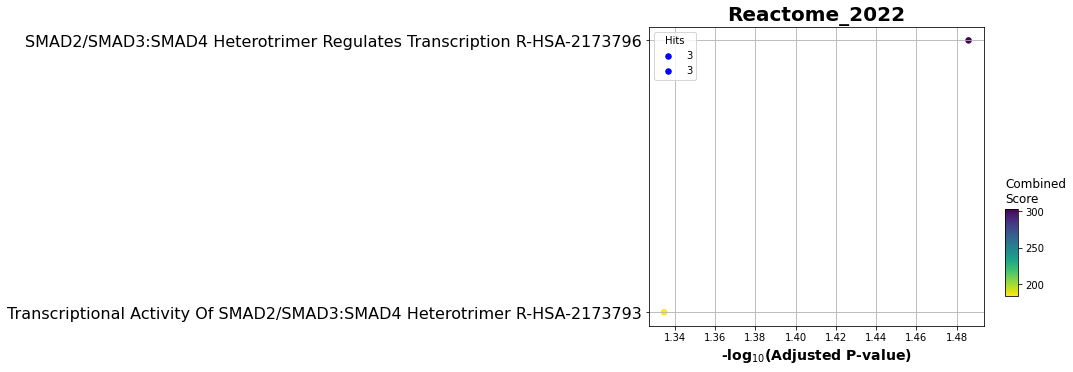

In [12]:
gp.dotplot(enr_rt.res2d, title='Reactome_2022',cmap='viridis_r', top_term=25,cutoff=0.05)

In [13]:
df_down =enr_go.res2d[enr_go.res2d['Adjusted P-value']<0.05]
print(len(df_down))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_down)

0
Empty DataFrame
Columns: [Gene_set, Term, Overlap, P-value, Adjusted P-value, Old P-value, Old Adjusted P-value, Odds Ratio, Combined Score, Genes]
Index: []


# selected

In [ ]:
#df1 = enr_go.res2d[(enr_go.res2d['Term'].str.match('inflammatory response')) | (enr_go.res2d['Term'].str.match('pattern recognition receptor signaling pathway'))
                #  | (enr_go.res2d['Term'].str.match('positive regulation of cell activation'))]

In [ ]:
#enr_go.res2d.iloc[[2, 3, 4]]

In [ ]:
index =[3,7,8,15,16,17,18,26,27,29,32,40,41,43,47,49]
df1 = enr_go.res2d.iloc[index]
df1

In [ ]:
#df2 = enr_hm.res2d[(enr_hm.res2d['Term'].str.contains('IL-6')) ]
#df2

In [ ]:
#df2 =enr_hm.res2d

In [ ]:
#df2=enr_hm.res2d[0:1]
#df2

In [ ]:
#df = pd.concat([df1,df2 ])
#df

In [ ]:
df1['Term']

In [ ]:
import re 
df1['Term'] = df1['Term'].str.replace(r"\(.*?\)", "", regex=True)

In [ ]:
gp.barplot(df1, title='T cell compartment',cmap='viridis_r', top_term=25,cutoff=0.05,figsize=(5, 3),)

In [ ]:
gp.dotplot(df1, title='T cell compartment',cmap='viridis_r', top_term=25,cutoff=1,figsize=(5, 10.5),ofname='Tcell compartment.pdf')

In [ ]:
df.to_csv('/home/jovyan/scripts/renal_covid_19/renal_vs_non_renal/for_fig2/CD14mono_selected_gesa.csv')

# upregulated

In [ ]:
glist_up=list(DE_up['de_gene'])

In [ ]:
len(glist_up)

In [ ]:
#remove MT and Ribo gene
newlist = [x for x in glist_up if not x.startswith('MT-')]
newlist1 = [x for x in newlist if not x.startswith('RPL')]
newlist2 = [x for x in newlist1 if not x.startswith('RPS')]

In [ ]:
len(newlist2)

In [ ]:
# run enrichr
# if you are only intrested in dataframe that enrichr returned, please set no_plot=True

# list, dataframe, series inputs are supported
enr_go = gp.enrichr(gene_list=newlist2,
                 gene_sets=['GO_Biological_Process_2021'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 #background='hsapiens_gene_ensembl',
                 description='test_name',
                 outdir='gsea_output/',
                 no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )

enr_kegg = gp.enrichr(gene_list=newlist2,
                 gene_sets=['KEGG_2021_Human'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 #background='hsapiens_gene_ensembl',
                 description='test_name',
                 outdir='gsea_output/',
                 no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )

enr_hm = gp.enrichr(gene_list=newlist2,
                 gene_sets=['MSigDB_Hallmark_2020'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 #background='hsapiens_gene_ensembl',
                 description='test_name',
                 outdir='gsea_output/',
                 no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )

In [ ]:
gp.dotplot(enr_kegg.res2d, title='KEGG_2021_Human',cmap='viridis_r', top_term=25)

In [ ]:
gp.dotplot(enr_go.res2d, title='GO_Biological_Process_2021',cmap='viridis_r', top_term=25,cutoff=0.05)

In [ ]:
gp.dotplot(enr_hm.res2d, title='MSigDB_Hallmark_2020',cmap='viridis_r', top_term=25,cutoff=0.05)

In [ ]:
df_up = enr_go.res2d[enr_go.res2d['Adjusted P-value']<0.05]
print(len(df_up))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_up)
    

# leading edge gene

In [ ]:
df1

In [ ]:
df1.to_csv('down_regulated_Tcell.csv')

In [ ]:
genes=df1['Genes'].tolist()

In [ ]:
genes

In [ ]:
leading_edge_gene =[]
for i in range (0,len(genes)):
    gene = genes[i].split(';')
    leading_edge_gene.append(gene)

In [ ]:
leading_edge_gene

In [ ]:
flat_list = []
for sublist in leading_edge_gene:
    for item in sublist:
        flat_list.append(item)

In [ ]:
len(flat_list)

In [ ]:
flat_list

In [ ]:
le_gene=list(set(flat_list))

In [ ]:
len(le_gene)

In [ ]:
le_gene